<a href="https://colab.research.google.com/github/kholbyjack/EmployeeSalaryPrediction/blob/main/Kaitlyn_Holbert_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Employee Salary Prediction

# Introduction:

*   In this project, you will predict employee salaries (AnnualSalary) based on various professional experience, education, and performance features.
*   You will conduct data exploration, preprocessing, and train machine learning models to predict employee compensation.
*   Finally, you'll evaluate the models using regression metrics.

**Datasets Locations and Names:** Canvas -> Modules -> Week 10 -> Dataset -> "employee_salary.csv".

Please save your Google Colab project as FirstName_LastName_Project3.ipynb and submit (upload) your source code to Canvas.

# **Practical Tip (for Colab users without GPU/with limited resources):**
If runtime is too slow, you may use random sampling to work with a smaller subset of the dataset (e.g., 30k–50k rows) for EDA, training, evaluation, and GridSearchCV.
Once you have selected your best model and hyperparameters, retrain and evaluate your final model on the full dataset and report those results in your conclusion.

# Dataset Description:

* **YearsExperience:** Total years of professional work experience.
* **EducationLevel:** Highest level of education completed (High School, Bachelor's, Master's, PhD).
* **JobTitle:** Current job position (Junior, Mid-Level, Senior, Lead, Manager).
* **Department:** Department where the employee works (IT, Sales, Marketing, HR, Finance, Operations).
* **PerformanceScore:** Annual performance rating (1-5 scale, where 5 is excellent).
* **ProjectsCompleted:** Number of projects completed in the last year.
* **OvertimeHours:** Average overtime hours per month.
* **TrainingHours:** Hours of professional training completed in the last year.
* **Certifications:** Number of professional certifications held.
* **TeamSize:** Number of people in the employee's immediate team.
* **RemoteWork:** Work arrangement (Fully Remote, Hybrid, On-site).
* **CompanyTenure:** Number of years with the current company.
* **Age:** Age of the employee.
* **AnnualSalary:** The target variable, representing the employee's annual salary in dollars.

# Task 1: Exploratory Data Analysis (EDA)
* Visualize the distribution of the target variable (`AnnualSalary`).
* Create scatter plots or histograms to explore relationships between features and the target.
* Check for missing values.
* Identify and visualize potential outliers in the target variable.
* Explore salary distributions across different categories (JobTitle, Department, EducationLevel).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsExperience    80000 non-null  float64
 1   EducationLevel     80000 non-null  object 
 2   JobTitle           80000 non-null  object 
 3   Department         80000 non-null  object 
 4   PerformanceScore   73600 non-null  float64
 5   ProjectsCompleted  80000 non-null  int64  
 6   OvertimeHours      80000 non-null  float64
 7   TrainingHours      75200 non-null  float64
 8   Certifications     76000 non-null  float64
 9   TeamSize           80000 non-null  int64  
 10  RemoteWork         74400 non-null  object 
 11  CompanyTenure      80000 non-null  float64
 12  Age                80000 non-null  int64  
 13  AnnualSalary       80000 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 8.5+ MB

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 

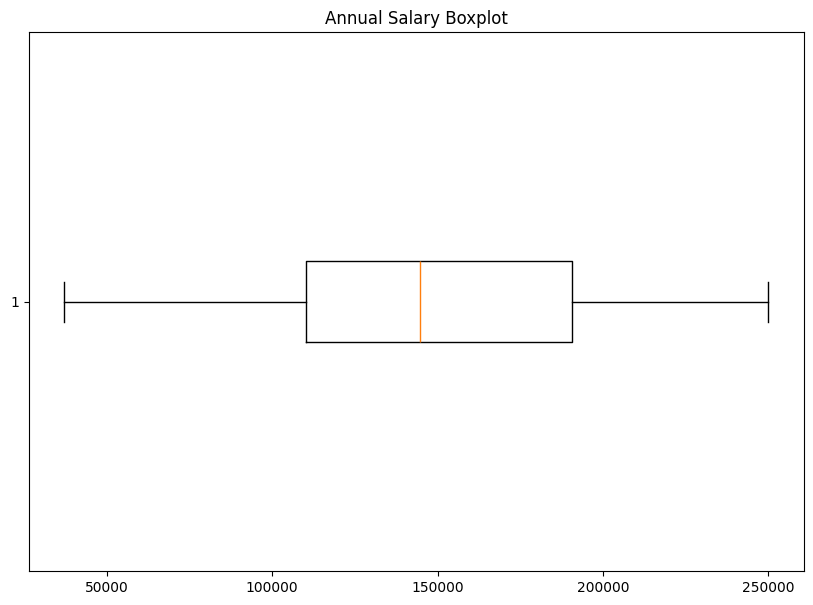

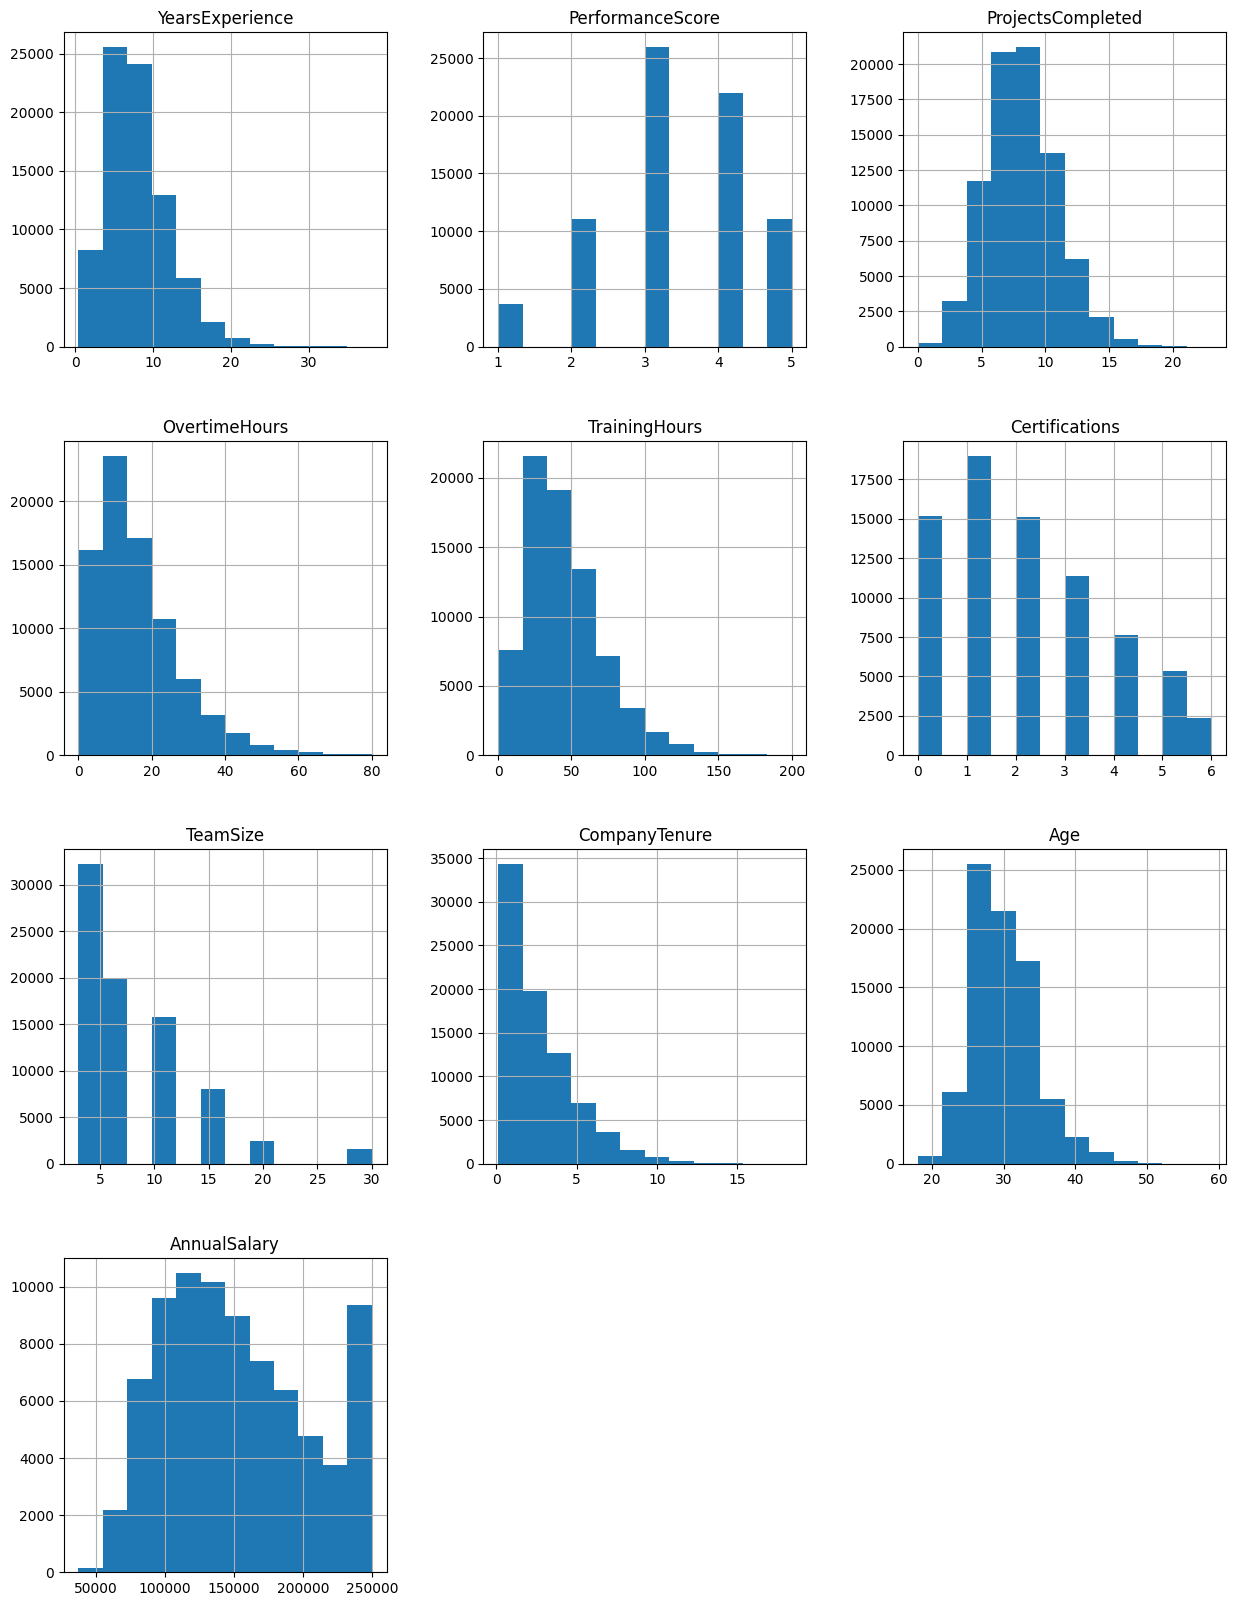

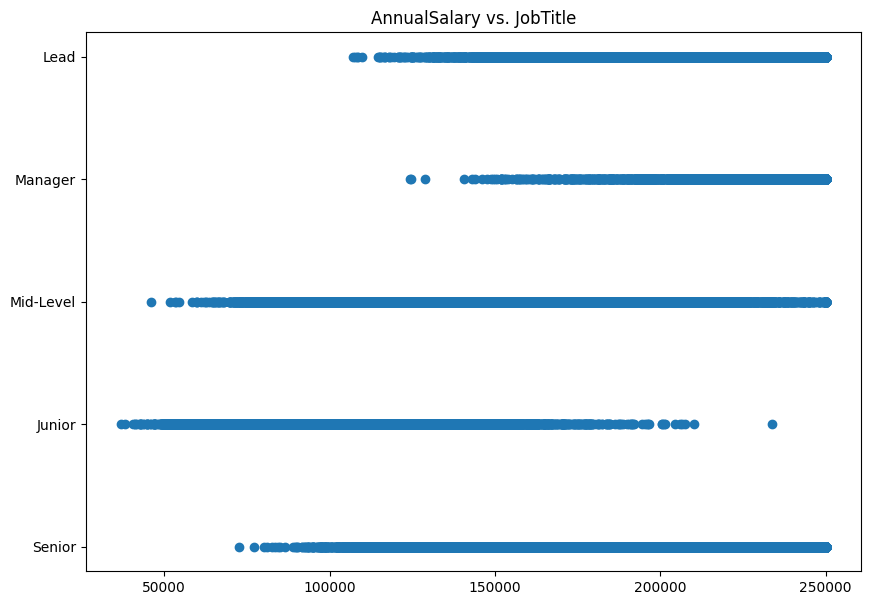

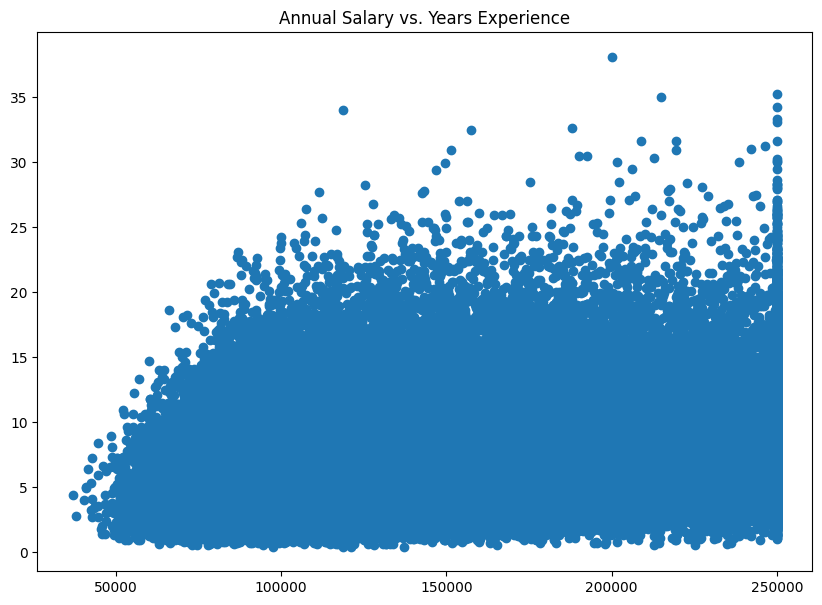

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#importing file, 80000 lines, so use 37.5 percent to get 30k lines in sample set
salaries = pd.read_csv("employee_salary.csv")

# missing values check
salaries.info()
print()

# cleaning data
salaries.drop_duplicates()

# random sampling
sal_sample = salaries.sample(frac=0.375, random_state = 42)
train_set_sample, test_set_sample = train_test_split(sal_sample, test_size=0.2, random_state=42)

sal_sample.info()
print()

# There are missing values in PerformanceScore, TrainingHours, Certifications, and RemoteWork

# distribution of annual salary, shown with a boxplot
fig = plt.figure(figsize =(10, 7))

plt.boxplot(salaries["AnnualSalary"], vert=False)
plt.title("Annual Salary Boxplot")
plt.show()

# histograms for features and annual salary
salaries.hist(bins=12, figsize=(15, 20))

# identify potential outliers
# as seen in the boxplot, there are no obvious outliers in annual salary

# salary distributions across education level and years experience with scatter plots
fig = plt.figure(figsize =(10, 7))

plt.scatter(salaries["AnnualSalary"], salaries["JobTitle"])
plt.title("AnnualSalary vs. JobTitle")
plt.show()

fig = plt.figure(figsize =(10, 7))

plt.scatter(salaries["AnnualSalary"], salaries["YearsExperience"])
plt.title("Annual Salary vs. Years Experience")
plt.show()

# Task 2: Data Preprocessing with Pipelines and Feature Engineering
* Use Pipeline for handling missing values, scaling, and feature engineering.
* Use ColumnTransformer for applying different transformations to numeric and categorical features.
* Consider creating new features (e.g., experience-to-age ratio, projects per year rate).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# numerical and categorical attributes
num_attributes = ['YearsExperience', 'PerformanceScore', 'ProjectsCompleted', 'OvertimeHours',
                  'TrainingHours', 'Certifications', 'TeamSize', 'CompanyTenure', 'Age']
cat_attributes = ['EducationLevel', 'JobTitle', 'Department', 'RemoteWork']

# numerical and categorical pipelines
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                  ('stdscaler', StandardScaler())])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('onehot', OneHotEncoder())])

# column transformer
transformer = ColumnTransformer([('num_preprocessing', num_pipeline, num_attributes),
                                 ('cat_preprocessing', cat_pipeline, cat_attributes)
                                ])

# Task 3: Train Regression Models
Train the following 5 regression models within a pipeline:
* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regressor
* Support Vector Regressor


In [ ]:
from sklearn.linear_model import LinearRegression

# defining X and y
X = test_set_sample.drop('AnnualSalary', axis=1)
y = test_set_sample['AnnualSalary']

# fiting data
X_ = transformer.fit_transform(X)

# Linear regression
line_reg =  LinearRegression()
line_reg.fit(X_, y)
line_reg.predict(X_)

array([ 92374.7183645 , 191767.12507177, 126665.76072439, ...,
       238356.09093886,  95821.80701973, 184194.21776583])

In [ ]:
from sklearn.linear_model import Ridge

# Ridge regression with chjolesky
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_, y)
ridge_reg.predict(X_)

array([ 92412.1376254 , 191757.01418722, 126693.87424089, ...,
       238286.08370365,  95867.36717287, 184195.51074289])

In [ ]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso_reg = Lasso(alpha=0.1, max_iter=5000, tol=0.005)
lasso_reg.fit(X_, y)
lasso_reg.predict(X_)

array([ 92375.1221375 , 191766.96841073, 126666.86006614, ...,
       238354.94811893,  95822.02833632, 184194.48536935])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision tree regressor
dt_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_reg.fit(X_, y)
dt_reg.predict(X_)

array([ 82708.05084746, 205873.64341085, 124098.13753582, ...,
       237866.66666667,  91438.73015873, 189318.98734177])

In [ ]:
from sklearn.svm import SVR

# Support vector regressor
svr_reg = SVR(kernel="linear", C=50, epsilon=0.1)
svr_reg.fit(X_, y)
svr_reg.predict(X_)

array([ 96860.48053895, 182851.54169471, 129778.28779087, ...,
       214968.09004271, 101720.21446486, 178080.16082331])

# Task 4: Model Evaluation
* Evaluate your models using k-fold cross-validation (at least 5 folds) to assess how well the models generalize.
* Calculate and report the average R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) from the cross-validation.
* Compare and discuss models based on their cross-validated performance.


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# k fold cross evaluation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)	#5 folds


# dictionary for evaluation metrics
scoring = {'r2_score': make_scorer(r2_score),
           'mean_absolute_error': make_scorer(mean_absolute_error),
           'mean_squared_error': make_scorer(mean_squared_error),
           'root_mean_squared_error': make_scorer(root_mean_squared_error)}

# get scores for each model
scores_line = cross_validate(line_reg, X_, y, cv=skf, scoring=scoring, return_train_score=True)
scores_ridge = cross_validate(ridge_reg, X_, y, cv=skf, scoring=scoring, return_train_score=True)
scores_lasso = cross_validate(lasso_reg, X_, y, cv=skf, scoring=scoring, return_train_score=True)
scores_dt = cross_validate(dt_reg, X_, y, cv=skf, scoring=scoring, return_train_score=True)
scores_svr = cross_validate(svr_reg, X_, y, cv=skf, scoring=scoring, return_train_score=True)

# average scores, make a dictionary with all scores for models
scores = {"Linear Regression": scores_line,
          "Ridge Regression": scores_ridge,
          "Lasso Regression": scores_lasso,
          "Decision Tree Regressor": scores_dt,
          "Support Vector Regressor": scores_svr}

# for loop for printing evaluation metrics
for key, value in scores.items():
  print(f"Scores for {key}")
  print(f"R2 score = {round(np.mean(value['test_r2_score']), 5)}")
  print(f"Mean Absolute Error = {round(np.mean(value['test_mean_absolute_error']), 5)}")
  print(f"Mean Squared Error = {round(np.mean(value['test_mean_squared_error']), 5)}")
  print(f"Root Mean Squared Error = {round(np.mean(value['test_root_mean_squared_error']), 5)}")
  print()

# comparision and discussion:
# Linear, Ridge, and Lasso regression all have very similar scores, with Lasso having the least amount of
# mean squared error. The support vector regressor is the worst model with an r2 score of around 0.75.


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Scores for Linear Regression
R2 score = 0.95612
Mean Absolute Error = 8352.47538
Mean Squared Error = 122947051.39682
Root Mean Squared Error = 11085.37176

Scores for Ridge Regression
R2 score = 0.95612
Mean Absolute Error = 8357.72262
Mean Squared Error = 122949461.57231
Root Mean Squared Error = 11085.6377

Scores for Lasso Regression
R2 score = 0.95612
Mean Absolute Error = 8352.52247
Mean Squared Error = 122947005.16802
Root Mean Squared Error = 11085.37122

Scores for Decision Tree Regressor
R2 score = 0.80905
Mean Absolute Error = 18036.14537
Mean Squared Error = 535167873.21885
Root Mean Squared Error = 23131.0635

Scores for Support Vector Regressor
R2 score = 0.74961
Mean Absolute Error = 17952.71725
Mean Squared Error = 702089467.88696
Root Mean Squared Error = 26481.26847



# Task 5: Hyperparameter Tuning with GridSearchCV
* Apply GridSearchCV to your best model for hyperparameter tuning.
* Test different hyperparameters relevant to your chosen model.
* Report the best parameters and the improved performance metrics.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search for Lasso Regression
label = test_set_sample.loc[:, 'AnnualSalary']

# parameter grid
param_grid = {
    'alpha': [0.01, 0.5, 1.0],
    'max_iter': [2000, 5000, 10000]
}

grid_search = GridSearchCV(estimator=Lasso(alpha=0.1, max_iter=5000, tol=0.005), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_, y)


# best params and scores
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'alpha': 0.01, 'max_iter': 2000}
Best score: -123323691.1841098


In [ ]:
# retraining best model (Lasso) with whole data set, and an alpha of 0.01 and max_iter=2000

# making training and test data out of the whole data set
train_set, test_set = train_test_split(salaries, test_size=0.2, random_state=42)

# defining X and y
X_final = test_set.drop('AnnualSalary', axis=1)
y_final = test_set['AnnualSalary']

# fiting data
X_final_ = transformer.fit_transform(X_whole)

# retraining
lasso_reg_whole = Lasso(alpha=0.01, max_iter=2000, tol=0.005)
lasso_reg_whole.fit(X_final_, y_final)
lasso_reg_whole.predict(X_final_)

# re-evaluation
scores_final = cross_validate(lasso_reg_whole, X_, y, cv=skf, scoring=scoring, return_train_score=True)

print("Scores for Final Lasso Model:")
print(f"R2 score = {round(np.mean(scores_final['test_r2_score']), 5)}")
print(f"Mean Absolute Error = {round(np.mean(scores_final['test_mean_absolute_error']), 5)}")
print(f"Mean Squared Error = {round(np.mean(scores_final['test_mean_squared_error']), 5)}")
print(f"Root Mean Squared Error = {round(np.mean(scores_final['test_root_mean_squared_error']), 5)}")

Scores for Final Lasso Model:
R2 score = 0.95612
Mean Absolute Error = 8352.48014
Mean Squared Error = 122947047.34418
Root Mean Squared Error = 11085.37173


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# Task 6: Feature Importance Analysis
* For Decision Tree model, analyze and visualize feature importance.
(In scikit-learn, DecisionTreeRegressor automatically compute feature importance after training)
* Discuss which features are most influential in predicting employee salaries.


In [ ]:
# for the decision tree model trained on sample data
feature_importance = dt_reg.feature_importances_

# go through and print feature numbers and their importances
for key, value in enumerate(feature_importance):
  print(f"Feature {key}'s importance: {value}")

# analysis and discussion:
# The first 13 features represent the original features, while the following thirteen features
# were automatically added when X was transformed. Feature 23, an added feature, is the most important feature in
# predicting employee salaries. Out of the original columns, age (feature 12) was the most feature.

Feature 0's importance: 0.035742466123107455
Feature 1's importance: 0.01461010619889026
Feature 2's importance: 0.00016505393363634285
Feature 3's importance: 0.0
Feature 4's importance: 0.0002655537046604804
Feature 5's importance: 0.004201746455198832
Feature 6's importance: 0.0
Feature 7's importance: 0.00015698049631008692
Feature 8's importance: 0.00043641114941669776
Feature 9's importance: 0.03626192384016731
Feature 10's importance: 0.038491986183291596
Feature 11's importance: 0.03898230289373142
Feature 12's importance: 0.0424637880786162
Feature 13's importance: 0.4391992361242635
Feature 14's importance: 0.0
Feature 15's importance: 0.00915251428659232
Feature 16's importance: 0.2724463378406274
Feature 17's importance: 0.06199515872814049
Feature 18's importance: 0.0003272984584717283
Feature 19's importance: 0.00018024505166635088
Feature 20's importance: 0.003759956274479983
Feature 21's importance: 0.0
Feature 22's importance: 0.0010789120316603898
Feature 23's importa

# Conclusion:
* Summarize your findings and explain any interesting insights from your analysis.

As can be seen in the histograms in *Step 1*, most of the employee data is left-skewed. Another interesting finding from the preliminary data analysis was that a lot of employees with little experience made higher salaries, but the longer an employee worked at this company, the less likely they are to make below 100,000 dollars. The mean absolute error and root mean square error for all of the five regression models were fairly high, although the mean absolute error was always a way higher value than the other errors. The linear, ridge, and lasso R2 scores were the same, 0.96, and their errors only slightly varried. Lasso regression was selected to represent the best model as its errors were slightly lower than the other two linear regressors. The decision tree regressor and the standard vector regressor performed significantly worse than the other three regressors, with R2 values of 0.81 and 0.75 respectively. Retraining the lasso regression model with the best parameters did not significantly improve the results. For the decision tree, the most important features in training were added automatically when the data was transformed.



